In [1]:
import planner as pl
from matplotlib.animation import FuncAnimation
import matplotlib.pyplot as plt

### define a square map

In [2]:
squareMap = pl.SquareMap(0, 0, 100, 50)

### define planner

In [3]:
# starting node
start = pl.TreeNode(10, 10)
goal = pl.TreeNode(73, 40)
planner = pl.RRTPlanner(squareMap, start, goal, 10000, 5, 5, 1)

### define map and obstacles

In [4]:
planner.AddObstacles(pl.Obstacles(50, 15, 8))
planner.AddObstacles(pl.Obstacles(50, 35, 8))

### show the map and the obstacles

[6.855948643914142, 10]
[6.1122061435443005, 10]


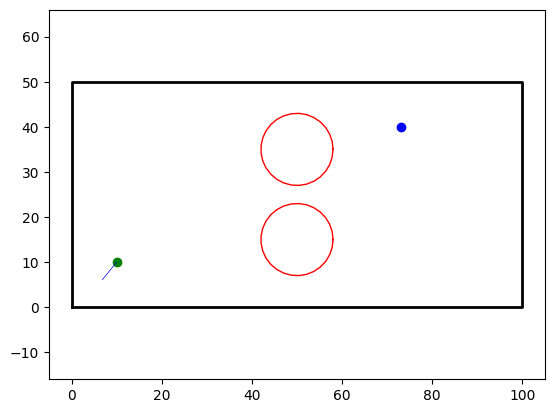

[12.820697151086533, 10]
[14.128397701512334, 10]
[14.28379973657421, 10]
[7.421422908477095, 10]
[19.199084023340703, 14.28379973657421]
[6.504918472990612, 7.421422908477095]
[15.275683969141301, 12.820697151086533]
[18.484202991372904, 14.128397701512334]
6


In [5]:
x_m, y_m = pl.GenerateMapBorder(squareMap)
ob_coordinate = list()
for ob in planner.obstacleList:
    x, y = pl.GenerateCircles(ob)
    ob_coordinate.append([x, y])

plt.ion()  # turning interactive mode on
fig, ax = plt.subplots()
ax.axis('equal')
ax.plot(x_m, y_m, color = 'k', linewidth=2.0)
# calling pause function in interactive mode to wait for 
# drawing to complete
for X in ob_coordinate:
    ax.plot(X[0], X[1], color = 'r', linewidth=1.0)
    fig.canvas.draw()
    fig.canvas.flush_events()

# start location
ax.scatter(planner.start_pos.pos_x, planner.start_pos.pos_y, c='g')
# end location
ax.scatter(planner.goal_pos.pos_x, planner.goal_pos.pos_y, c='b')

for _ in range(20):
    if planner.UpdateOneStep():
        parentIdx = planner.nodeList[-1].parent
        x = [planner.nodeList[-1].pos_x, planner.nodeList[parentIdx].pos_x]
        y = [planner.nodeList[-1].pos_y, planner.nodeList[parentIdx].pos_y]
        print(x)
        print(y)
        ax.plot(x, y, color = 'b', linewidth=0.5)
        fig.canvas.draw()
        fig.canvas.flush_events()
        plt.pause(0.2)

print(len(planner.nodeList))

### perform one step update